In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_csv('student-mat.csv',delimiter=";")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
from sklearn.preprocessing import LabelEncoder

df['school'] = LabelEncoder().fit_transform(df['school'])
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['address'] = LabelEncoder().fit_transform(df['address'])
df['famsize'] = LabelEncoder().fit_transform(df['famsize'])
df['Pstatus'] = LabelEncoder().fit_transform(df['Pstatus'])
df['Mjob'] = LabelEncoder().fit_transform(df['Mjob'])
df['Fjob'] = LabelEncoder().fit_transform(df['Fjob'])
df['reason'] = LabelEncoder().fit_transform(df['reason'])
df['guardian'] = LabelEncoder().fit_transform(df['guardian'])

In [4]:
X= df[['G1']]
y = df['absences']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [5]:
print("Stats for Model trained and tested with OLS")
print("Coefficient: ",model1.coef_)
print("Intercept: ",model1.intercept_)
print("R2 Score: ",r2_score(y_test,y_pred))
print("MSE: ",mean_squared_error(y_test,y_pred))

Stats for Model trained and tested with OLS
Coefficient:  [-0.01104234]
Intercept:  6.025795239967574
R2 Score:  -0.02466195889548839
MSE:  36.72627510162628


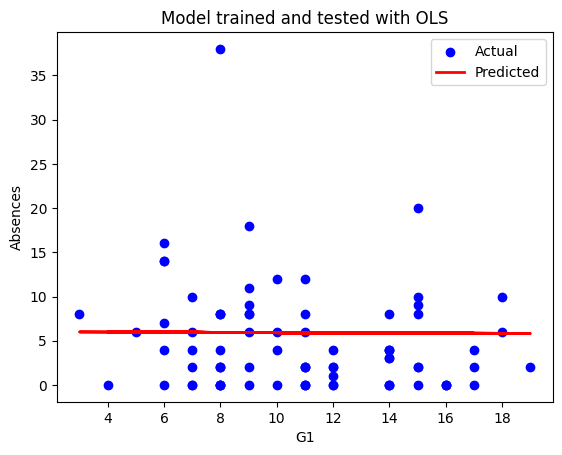

In [6]:
plt.scatter(X_test,y_test,color='blue',label="Actual")
plt.plot(X_test,y_pred,color='red',linewidth=2,label="Predicted")
plt.xlabel("G1")
plt.ylabel("Absences")
plt.title("Model trained and tested with OLS")
plt.legend()
plt.show()

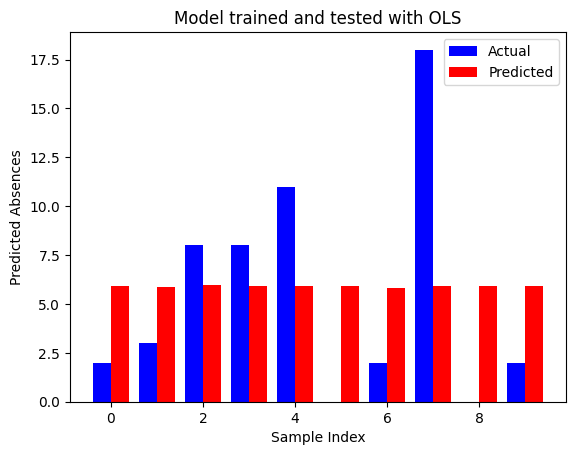

In [7]:
n=10
indices = np.arange(n)
plt.figure()
plt.bar(indices - 0.2, y_test[:n],width=0.4,color='blue',label='Actual')
plt.bar (indices +0.2, y_pred[:n],width=0.4,color='red',label='Predicted')
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel('Predicted Absences')
plt.title("Model trained and tested with OLS")
plt.show()

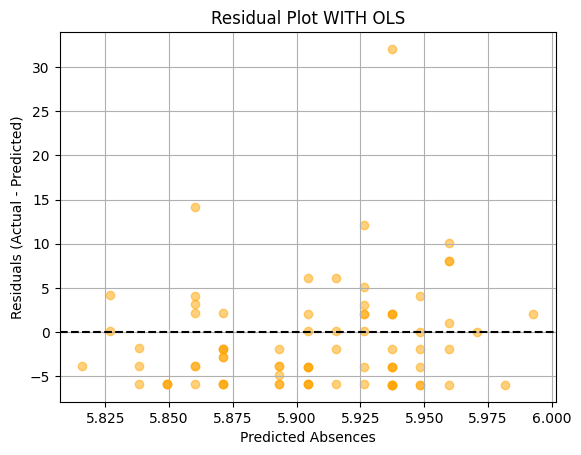

In [8]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='orange', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Absences')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot WITH OLS')
plt.grid(True)
plt.show()

In [9]:
model2 = SGDRegressor(max_iter=100, learning_rate='invscaling', eta0=0.01, random_state=42)
X_train_scaled = StandardScaler().fit_transform(X_train)
model2.fit(X_train_scaled, y_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
y_pred2 = model2.predict(X_test_scaled)

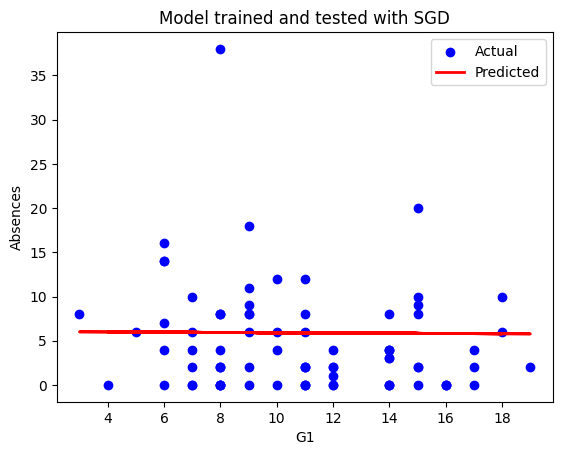

In [10]:
plt.scatter(X_test,y_test,color='blue',label="Actual")
plt.plot(X_test,y_pred2,color='red',linewidth=2,label="Predicted")
plt.xlabel("G1")
plt.ylabel("Absences")
plt.title("Model trained and tested with SGD")
plt.legend()
plt.show()

In [11]:
print("Stats for Model trained and tested with SGD")
print("Coefficient: ",model2.coef_)
print("Intercept: ",model2.intercept_)
print("R2 Score: ",r2_score(y_test,y_pred2))
print("MSE: ",mean_squared_error(y_test,y_pred2))

Stats for Model trained and tested with SGD
Coefficient:  [-0.05342538]
Intercept:  [5.89157057]
R2 Score:  -0.02317446457824346
MSE:  36.67295983503229


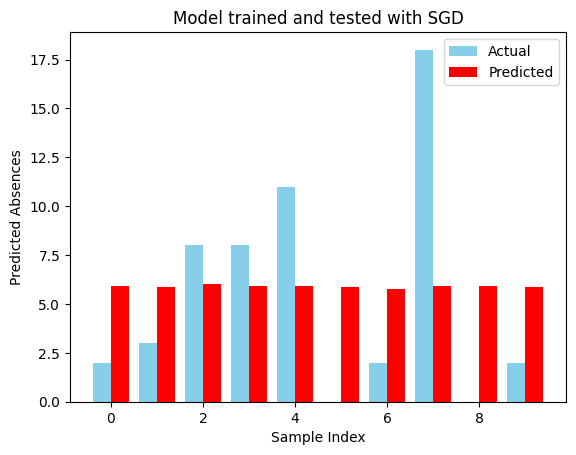

In [12]:
n=10
indices = np.arange(n)
plt.figure()
plt.bar(indices - 0.2, y_test[:n],width=0.4,color='skyblue',label='Actual')
plt.bar (indices +0.2, y_pred2[:n],width=0.4,color='red',label='Predicted')
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel('Predicted Absences')
plt.title("Model trained and tested with SGD")
plt.show()

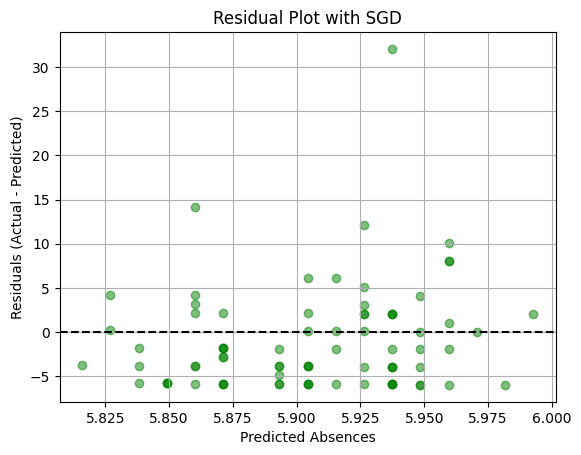

In [13]:
residuals = y_test - y_pred2
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Absences')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot with SGD')
plt.grid(True)
plt.show()